In [274]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error

path_to_csv = "Video_Games_Sales_as_at_22_Dec_2016.csv"
df_vg_sales = pd.read_csv(path_to_csv)

**Let's have a look at the dataset**

In [275]:
df_vg_sales.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


Create a weighted score:

```
user_score(0-10) * user_count
            +
critic_score(0-100)/10 * critic_count

/ (user_count + critic_count)
```



In [276]:
df_vg_sales["User_Score"] = df_vg_sales["User_Score"].replace("tbd", np.nan).astype(float)

df_vg_sales["Weighted_Critic_Score"] = (df_vg_sales["User_Score"] * df_vg_sales["User_Count"] +
        df_vg_sales["Critic_Score"]/10 * df_vg_sales["Critic_Count"]) / (df_vg_sales["User_Count"] + df_vg_sales["Critic_Count"])
df_vg_sales.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Weighted_Critic_Score
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,7.945308
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.290665


**Add years since release**

In [277]:
current_year = 2016
df_vg_sales['Years_Since_Release'] = current_year - df_vg_sales['Year_of_Release']
df_vg_sales.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Weighted_Critic_Score,Years_Since_Release
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,7.945308,10.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.290665,8.0


We select our features and we want to predict 'Global Sales'.
**Drop 'NA' Values in the respective columns**

In [278]:
feature_columns = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Weighted_Critic_Score', 'Years_Since_Release', 'Rating', 'Developer', 'Platform', 'Genre']
prediction_column = ['Global_Sales']
all_columns = feature_columns + prediction_column

print("Dropping NA Values in following columns")
for column in all_columns:
  print(column)
print(f"Before dropping NA Values Video Game Sales Data has {df_vg_sales.shape[0]} entries with a total of {df_vg_sales.shape[1]} columns.")
df_vg_sales = df_vg_sales.dropna(subset=all_columns)
df_vg_sales.dropna()
print(f"After dropping NA Values: Video Game Sales Data has {df_vg_sales.shape[0]} entries with a total of {df_vg_sales.shape[1]} columns.")

Dropping NA Values in following columns
Critic_Score
Critic_Count
User_Score
User_Count
Weighted_Critic_Score
Years_Since_Release
Rating
Developer
Platform
Genre
Global_Sales
Before dropping NA Values Video Game Sales Data has 16719 entries with a total of 18 columns.
After dropping NA Values: Video Game Sales Data has 6826 entries with a total of 18 columns.


In [279]:
df_vg_sales.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Weighted_Critic_Score,Years_Since_Release
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,7.945308,10.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.290665,8.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,8.000000,7.0


Convert caterogical values into numbers/integers

PS3 -> 0
Wii -> 1
.
.
.



In [280]:
label_encoder = LabelEncoder()
for column in feature_columns:
  try:
    int(df_vg_sales.loc[0,column])
  except: # if it isn't a number -> label encoding
      df_vg_sales.loc[:,column] = label_encoder.fit_transform(df_vg_sales[column])

df_vg_sales[all_columns].head(3)

,Critic_Score,Critic_Count,User_Score,User_Count,Weighted_Critic_Score,Years_Since_Release,Rating,Developer,Platform,Genre,Global_Sales
0,76.0,51.0,8.0,322.0,7.945308,10.0,1,771,12,10,82.53
2,82.0,73.0,8.3,709.0,8.290665,8.0,1,771,12,6,35.52
3,80.0,73.0,8.0,192.0,8.000000,7.0,1,771,12,10,32.77


In [281]:
#Outlier removal

to_drop = "User_Count"

Q1 = df_vg_sales[to_drop].quantile(0.25)
Q3 = df_vg_sales[to_drop].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers by keeping only valid rows
filtered_df = df_vg_sales[(df_vg_sales[to_drop] >= lower_bound) & (df_vg_sales[to_drop] <= upper_bound)]



Select features and prediction columns

In [282]:
features = filtered_df[feature_columns]
target = filtered_df[prediction_column]

In [283]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target.iloc[:,0], test_size=0.2, random_state=42)

In [284]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [285]:
total_nan_values = np.isnan(X_test).sum()
print(f'Total NaN values in array: {total_nan_values}')

print(len(X_test))

#X_test = np.nan_to_num(X_test, nan=0)

Total NaN values in array: 0
1169


In [286]:
print(len(feature_columns))

10


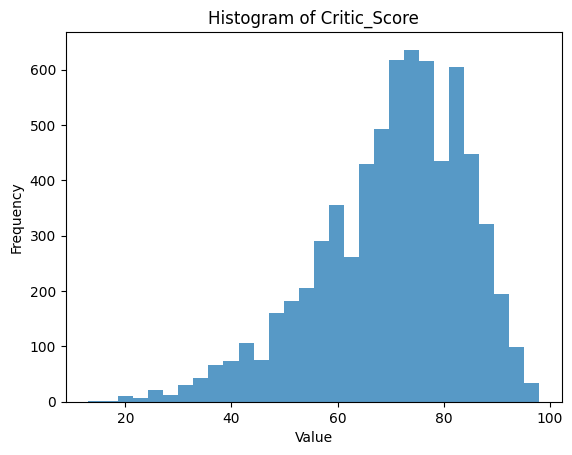

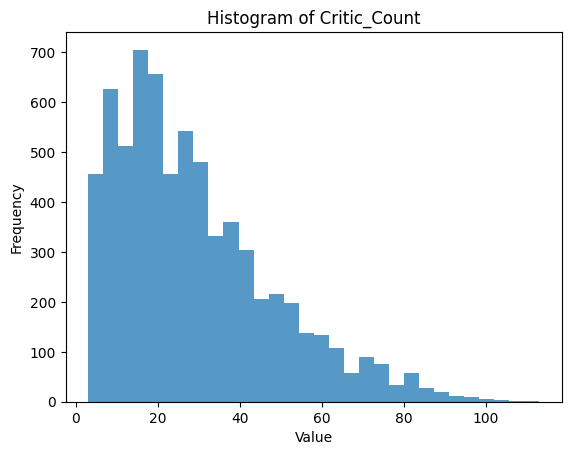

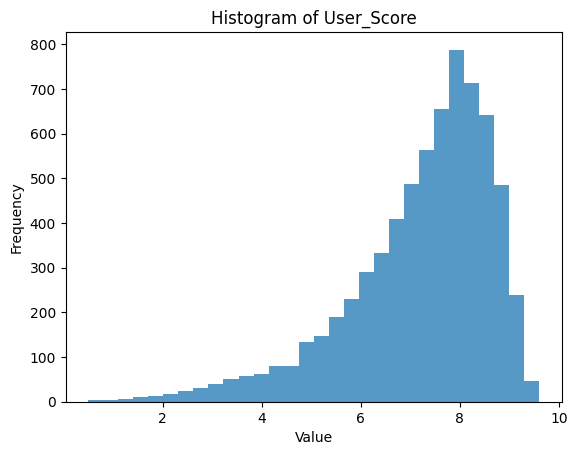

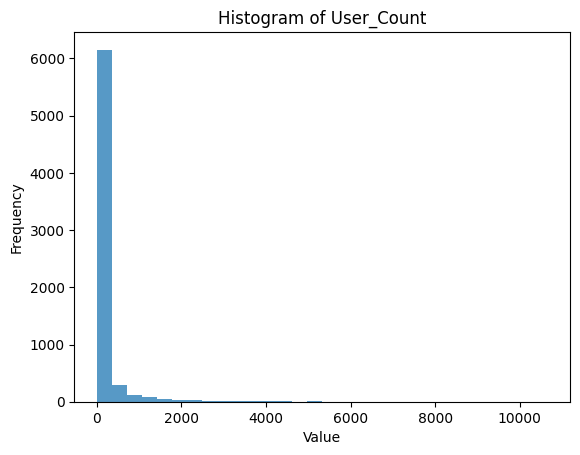

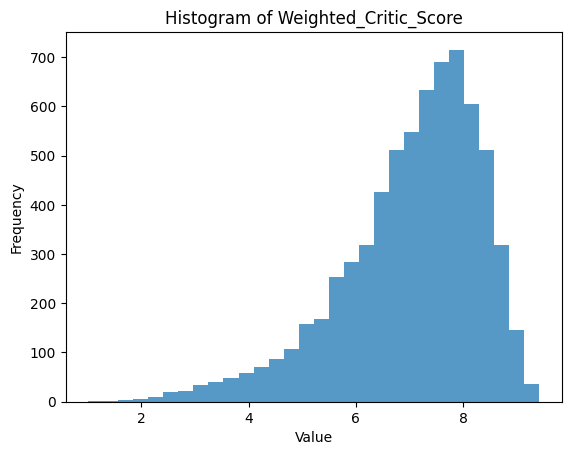

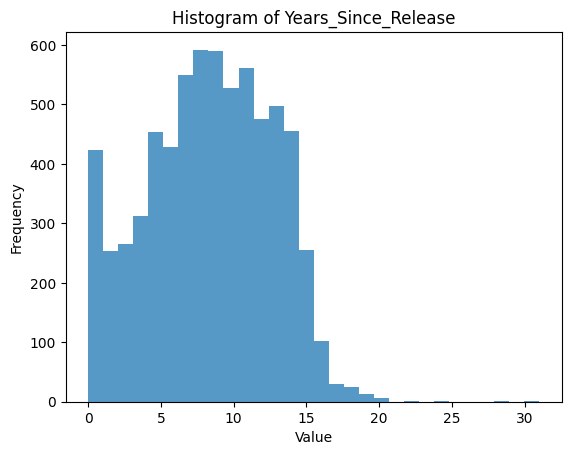

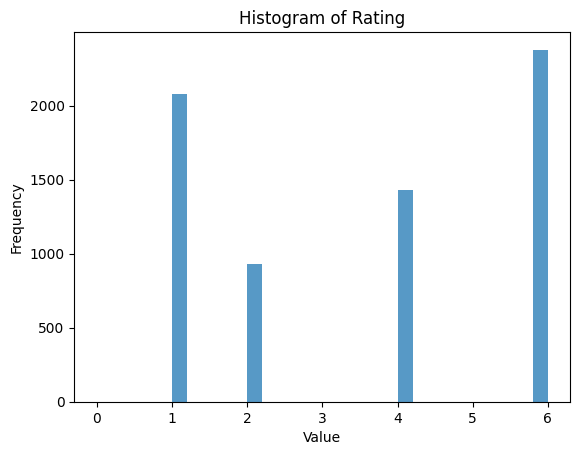

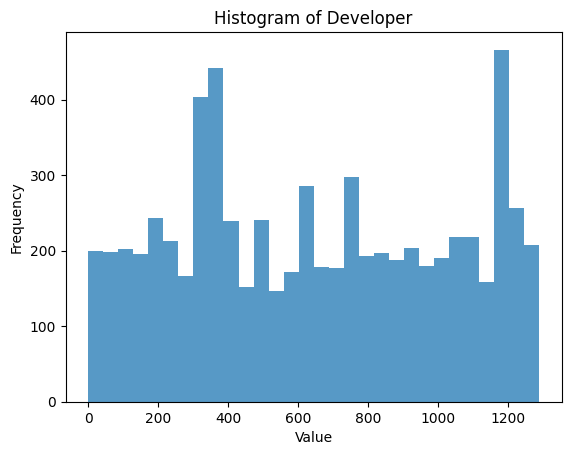

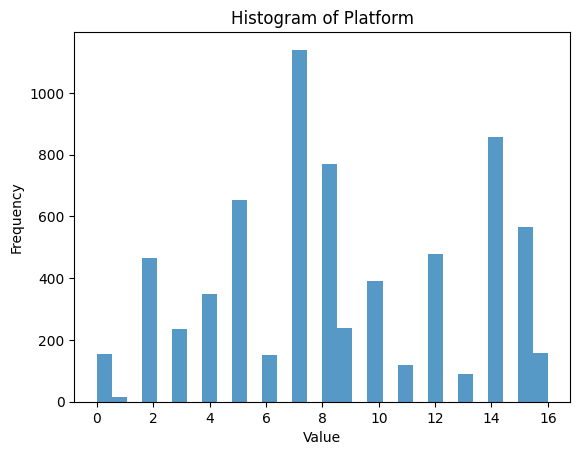

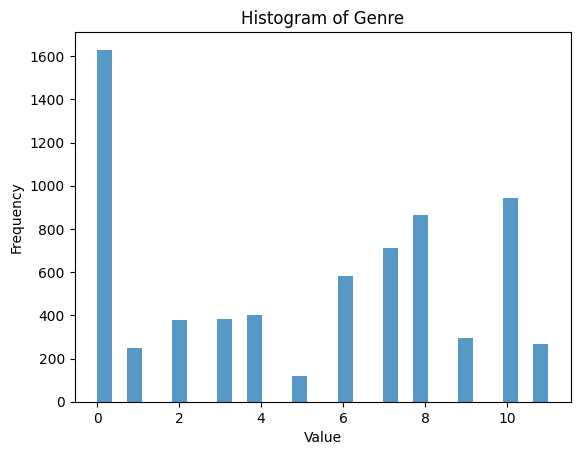

In [287]:
import matplotlib.pyplot as plt

for(i, column) in enumerate(feature_columns):
    plt.hist(df_vg_sales[feature_columns[i]], bins=30, alpha=0.75)
    plt.title(f'Histogram of {feature_columns[i]}')
    plt.xlabel('Value')
    
    plt.ylabel('Frequency')
    plt.show()

In [288]:
df_vg_sales[all_columns].head(3)

,Critic_Score,Critic_Count,User_Score,User_Count,Weighted_Critic_Score,Years_Since_Release,Rating,Developer,Platform,Genre,Global_Sales
0,76.0,51.0,8.0,322.0,7.945308,10.0,1,771,12,10,82.53
2,82.0,73.0,8.3,709.0,8.290665,8.0,1,771,12,6,35.52
3,80.0,73.0,8.0,192.0,8.000000,7.0,1,771,12,10,32.77


In [289]:
print(X_train[0:3])

[[ 0.41497277  2.26548087  0.94070307 -0.29005584  0.59978121  0.73659055
   0.26269776  0.76861396  1.46941322  0.74820023]
 [ 0.56382793 -0.217342    1.21935483 -0.54843606  0.91469385  1.23671028
  -1.11176046  0.15676072 -0.37571738  1.26953117]
 [-1.59457189 -0.15367988 -0.7312075  -0.66588161 -1.45948455 -0.26364891
   1.17900325 -0.06137827 -0.14507606 -1.3371235 ]]


In [290]:
y_train.head(3)

3674    0.55
6174    0.28
8351    0.17
Name: Global_Sales, dtype: float64

**Random Forest Regression**

In [291]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, criterion='squared_error')
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
mse_new = mean_squared_error(y_test, y_pred)
rmse_new = np.sqrt(mse_new)
r2_new = r2_score(y_test, y_pred)
mae_new = mean_absolute_error(y_test, y_pred)

print("Scores with additionally generated features")
print(f"Root-Mean-Square-Error (RMSE): {rmse_new:.3f}")
print(f"Coefficient of determination (r²): {r2_new:.3f}")
print(f"Mean Absolute Error (MAE): {mae_new:.3f}")

Scores with additionally generated features
Root-Mean-Square-Error (RMSE): 0.911
Coefficient of determination (r²): -0.043
Mean Absolute Error (MAE): 0.408


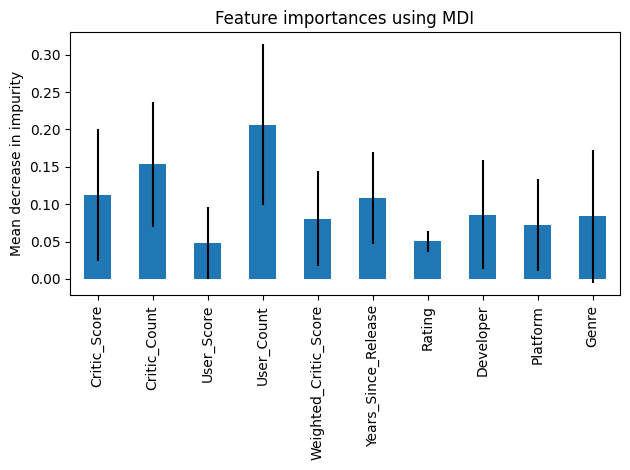

In [292]:
import time
start_time = time.time()
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances, index=feature_columns)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Elapsed time to compute the importances: 3.504 seconds


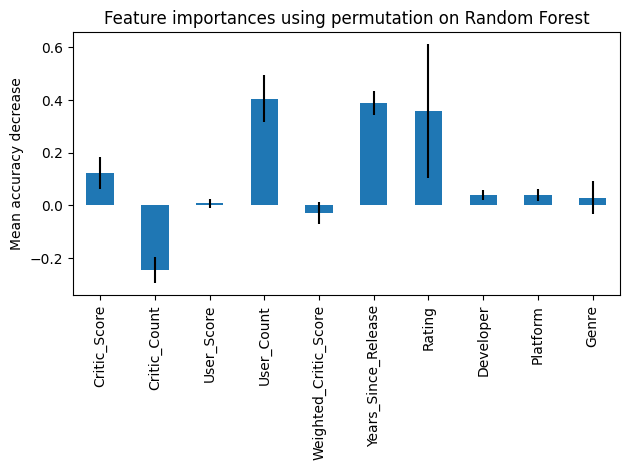

In [293]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rf_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on Random Forest")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Random Forest MAE, MSE, R²

In [294]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
random_forest_mae = mean_absolute_error(y_test, y_pred)
random_forest_mse = mean_squared_error(y_test, y_pred)
random_forest_r2 = r2_score(y_test, y_pred)

GradientBoosting Regression

In [295]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(alpha=0.4, n_estimators=100, max_depth=2)

gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
gradient_boosting_mae = mean_absolute_error(y_test, y_pred)
gradient_boosting_mse = mean_squared_error(y_test, y_pred)
gradient_boosting_r2 = r2_score(y_test, y_pred)

Feature importance using permutation in GradientBoosting Regression

Elapsed time to compute the importances: 0.101 seconds


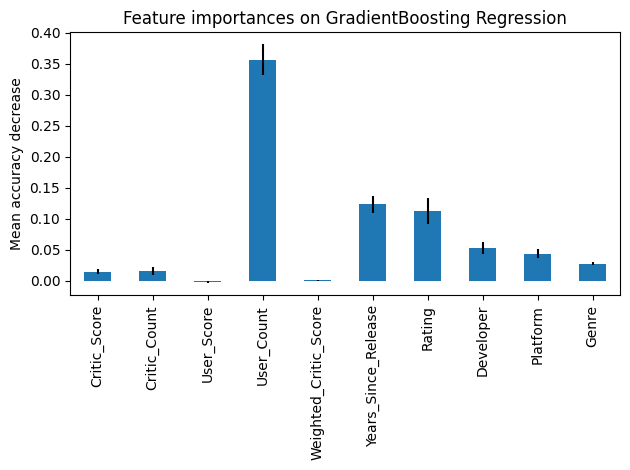

In [296]:
start_time = time.time()
result_gb = permutation_importance(
    gb_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

gb_importances = pd.Series(result_gb.importances_mean, index=feature_columns)

fig, ax = plt.subplots()
gb_importances.plot.bar(yerr=result_gb.importances_std, ax=ax)
ax.set_title("Feature importances on GradientBoosting Regression")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [297]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)


ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_r2 = r2_score(y_test, y_pred)


Ridge Regression Feature Importance

Elapsed time to compute the importances: 0.047 seconds


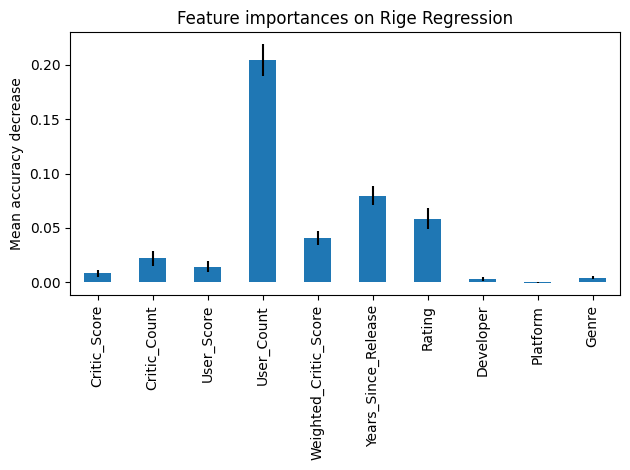

In [298]:
start_time = time.time()
result_ridge = permutation_importance(
    ridge_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

ridge_importances = pd.Series(result_ridge.importances_mean, index=feature_columns)

fig, ax = plt.subplots()
ridge_importances.plot.bar(yerr=result_ridge.importances_std, ax=ax)
ax.set_title("Feature importances on Rige Regression")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [299]:
import matplotlib.pyplot as plt
def plot_actual_vs_predicted(y_test, y_pred, y_x_max= None):
  # Scatter plot to visualize predicted vs actual sales
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.6)
  if y_x_max:
    plt.xlim(0, y_x_max)
    plt.ylim(0, y_x_max)
  plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red', label='Perfect Prediction Line')

  plt.xlabel('Actual Sales (Millions of Units)')
  plt.ylabel('Predicted Sales (Millions of Units)')
  plt.title('Actual vs. Predicted Global Sales')
  plt.legend()
  plt.grid(True)
  plt.show()

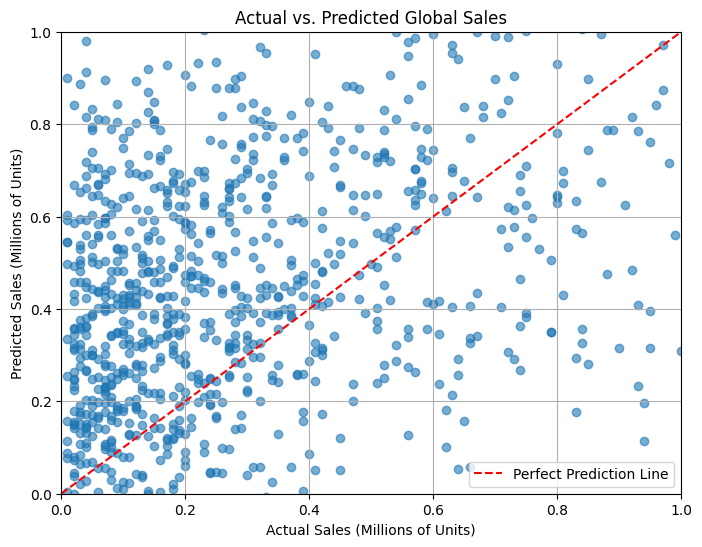

In [300]:
plot_actual_vs_predicted(y_pred=y_pred, y_test=y_test, y_x_max= 1)

In [301]:
to_edit = ['Developer', 'Rating' , 'Platform', 'Genre']

from xgboost import XGBRegressor
xg_model = XGBRegressor(n_estimators=100, max_depth=10, learning_rate= 0.3, enable_categorical = True)
xg_model.fit(X_train, y_train)
# Predictions and evaluation
y_pred_xg = xg_model.predict(X_test)
mse_xg = mean_squared_error(y_test, y_pred_xg)
rmse_xg = np.sqrt(mse_xg)
r2_xg = r2_score(y_test, y_pred_xg)
mae_xg = mean_absolute_error(y_test, y_pred_xg)

print("Scores with additionally generated features")
print(f"Root-Mean-Square-Error (RMSE): {rmse_xg:.3f}")
print(f"Coefficient of determination (r²): {r2_xg:.3f}")
print(f"Mean Absolute Error (MAE): {mae_xg:.3f}")

Scores with additionally generated features
Root-Mean-Square-Error (RMSE): 1.079
Coefficient of determination (r²): -0.462
Mean Absolute Error (MAE): 0.414


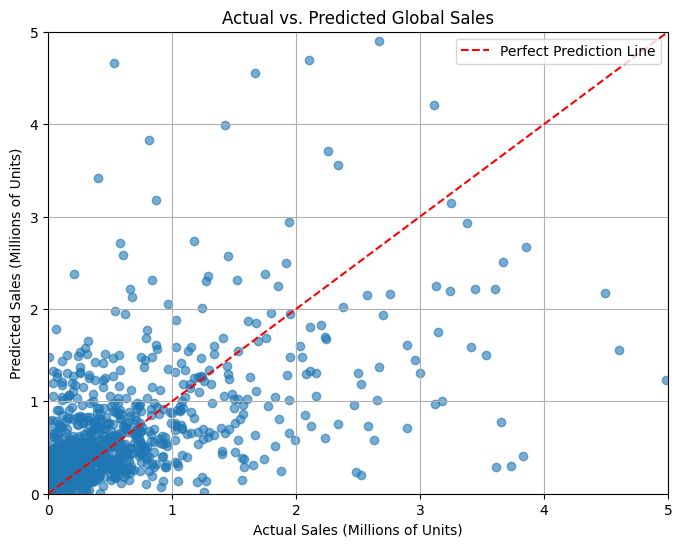

In [302]:
plot_actual_vs_predicted(y_pred=y_pred_xg, y_test=y_test, y_x_max= 5)

In [303]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())
from sklearn.metrics import roc_auc_score
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

ebm = ExplainableBoostingRegressor(feature_columns, interactions=3)
ebm.fit(X_train, y_train)

ExplainableBoostingRegressor(feature_names=['Critic_Score', 'Critic_Count',
                                            'User_Score', 'User_Count',
                                            'Weighted_Critic_Score',
                                            'Years_Since_Release', 'Rating',
                                            'Developer', 'Platform', 'Genre'],
                             interactions=3)

In [304]:
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

In [305]:
ebm_local = ebm.explain_local(X_test[:5], y_test[:5], name='EBM')
show(ebm_local, 0)

In [306]:
from interpret.perf import RegressionPerf
ebm_perf = RegressionPerf(ebm, feature_columns).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)

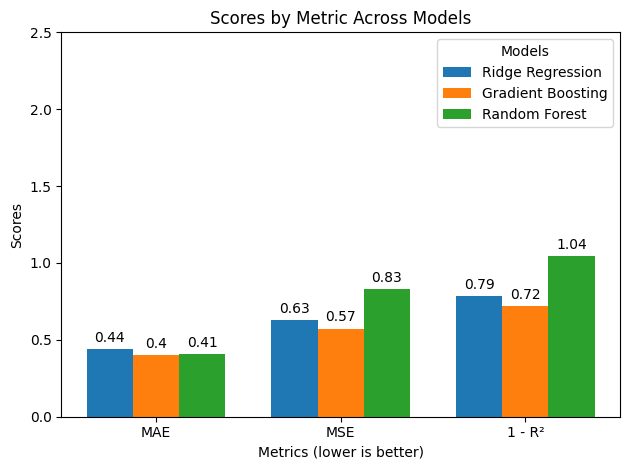

In [307]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these with your actual scores
models = ['Ridge Regression', 'Gradient Boosting', 'Random Forest']
ridge_scores = [ridge_mae, ridge_mse, 1 - ridge_r2]  # MAE scores
gradient_boosting_scores = [gradient_boosting_mae, gradient_boosting_mse, 1 - gradient_boosting_r2]  # MSE scores
random_forest_scores = [random_forest_mae, random_forest_mse, 1 - random_forest_r2]      # R² scores

# This will create an array with positions for the groups
metrics = ['MAE', 'MSE', '1 - R²']
index = np.arange(len(metrics))  # Array with elements [0, 1, 2] for the metrics
bar_width = 0.25  # Width of the bars


fig, ax = plt.subplots()

# Create bars for each model under each metric
rects1 = ax.bar(index - bar_width, ridge_scores, bar_width, label=models[0])
rects2 = ax.bar(index, gradient_boosting_scores, bar_width, label=models[1])
rects3 = ax.bar(index + bar_width, random_forest_scores, bar_width, label=models[2])

ax.set_xlabel('Metrics (lower is better)')
ax.set_ylabel('Scores')
ax.set_title('Scores by Metric Across Models')
ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.legend(title="Models")
ax.set_ylim([0, 2.5])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()
